In [136]:


import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal
from pathlib import *

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl


from scipy import optimize

In [3]:

file=Path("J:\\Users\Berners_Lukas\Thetascan\coolingrate")

In [4]:
xys=list(file.glob('**\*.xy'))

In [5]:
datas=[]
for xy in file.glob('**\*.xy'):
    data=[]
    data=pd.read_csv(xy,sep=' ',skiprows=1,names=['2theta','intensity'])
    # if xy.stem[-1]=='4':
    #     data=data[data['2theta']>99]
    data['fname']=xy.parent.stem
    datas.append(data)
df=pd.concat(datas)

In [108]:
data=pd.read_csv(xys[0],sep=' ',skiprows=1,names=['2theta','intensity'])

In [18]:

data

,2theta,intensity
0,35.00,1594.567
1,35.01,1604.538
2,35.02,1618.749
3,35.03,1610.409
4,35.04,1597.848
...,...,...
2696,61.96,458.170
2697,61.97,452.987
2698,61.98,442.260
2699,61.99,439.624


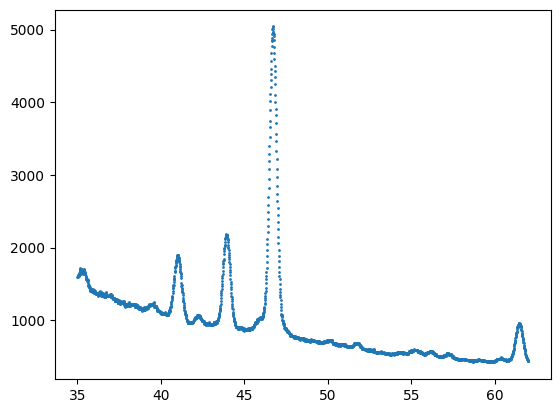

In [21]:
plt.scatter(data['2theta'],data['intensity'],s=1)

In [120]:
import numpy as np

from scipy.signal import argrelmin

# x = np.array([2, 1, 2, 3, 2, 0, 1, 0])
x=data['2theta'].values
y=data['intensity'].values

# argrelmin(x)
# (array([1, 5]),)

# y = np.array([[1, 2, 1, 2],

#               [2, 2, 0, 0],

#               [5, 3, 4, 4]])


# argrelmin(y)
# (array([0, 2]), array([2, 1]))

(array([   4,    8,   10,   19,   23,   26,   35,   39,   45,   51,   55,
          58,   68,   76,   79,   85,   88,   92,   97,  102,  107,  110,
         114,  116,  126,  130,  134,  137,  144,  150,  156,  162,  166,
         175,  177,  180,  182,  185,  188,  190,  193,  196,  201,  206,
         212,  225,  227,  233,  235,  238,  243,  249,  255,  260,  269,
         271,  274,  278,  284,  287,  290,  295,  299,  304,  308,  317,
         319,  325,  331,  339,  345,  350,  352,  355,  360,  364,  368,
         373,  376,  383,  386,  392,  394,  401,  403,  406,  410,  414,
         417,  421,  429,  431,  436,  443,  450,  461,  464,  468,  471,
         475,  479,  484,  488,  494,  498,  502,  504,  507,  511,  516,
         519,  522,  528,  530,  535,  537,  541,  552,  558,  576,  587,
         594,  600,  606,  623,  658,  663,  668,  672,  677,  681,  684,
         691,  693,  705,  709,  711,  716,  725,  730,  732,  739,  746,
         754,  760,  762,  768,  772, 

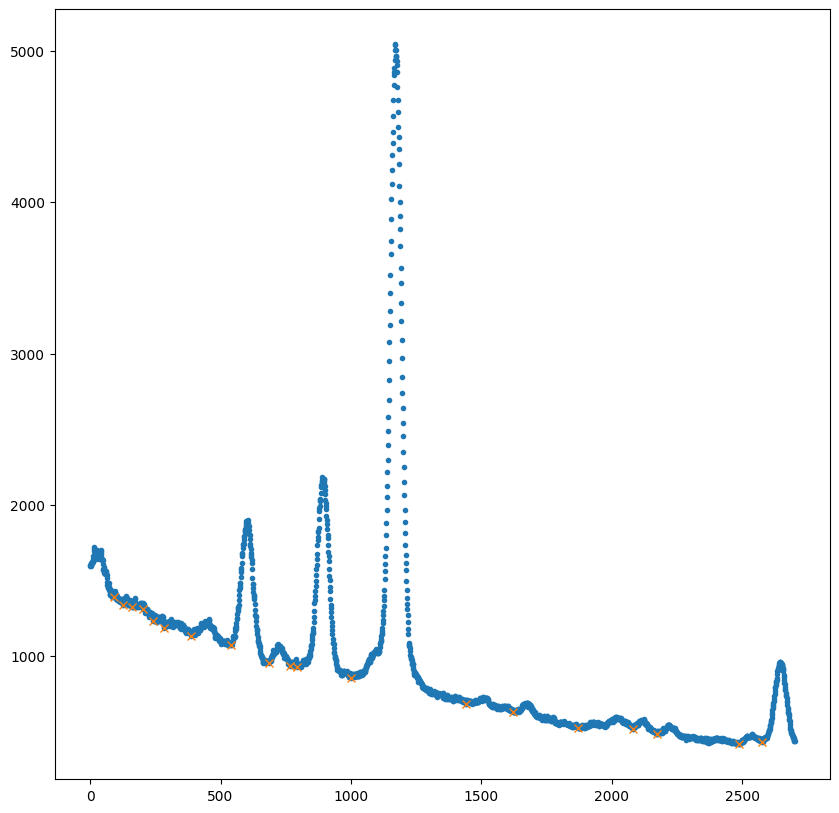

In [138]:
from scipy import signal
peaks, properties=signal.find_peaks(np.negative(y),prominence=40,distance=10)
fig,ax=plt.subplots(figsize=(10,10))
plt.plot(y,'.')
plt.plot(peaks[peaks>50],y[peaks[peaks>50]],'x')

In [139]:
def quadr_bkg(x,c0,c1,c2,c3=0,c4=0):
    return c0+c1*x+c2*x**+c3*x**3+c4*x**4

In [140]:
cheb=np.polynomial.Chebyshev.fit(x[peaks[peaks>50]],y[peaks[peaks>50]],2)

In [141]:
cheb

Chebyshev([ 797.0722882 , -458.02001205,   96.82387777], domain=[35.92, 60.76], window=[-1.,  1.], symbol='x')

In [142]:
params=optimize.curve_fit(quadr_bkg,x[peaks[peaks>50]],y[peaks[peaks>50]])

(0.0, 2000.0)

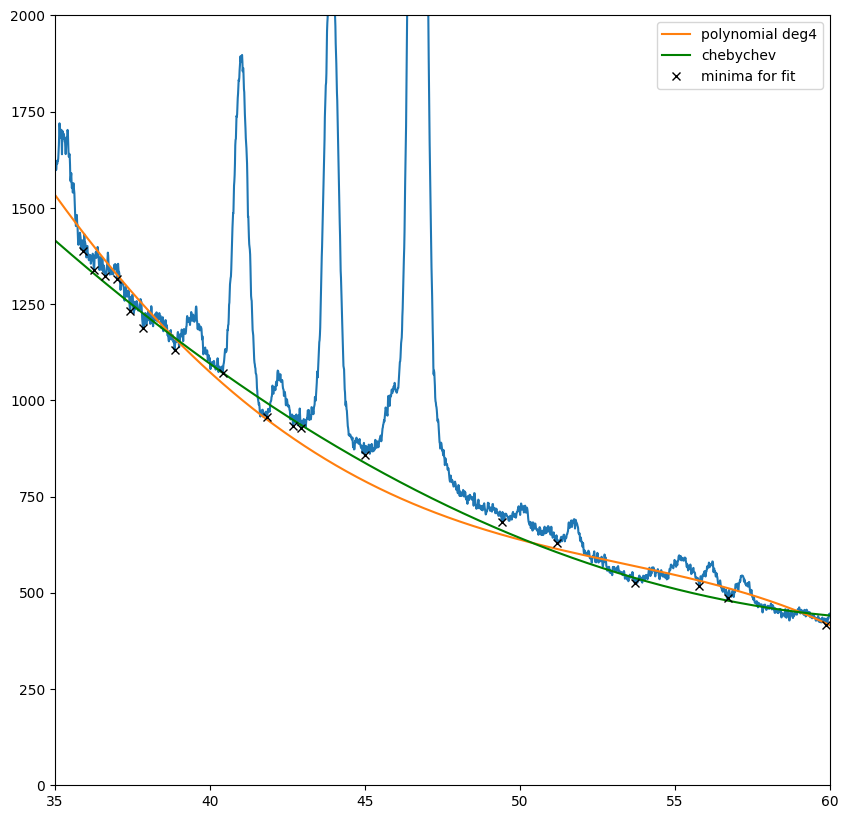

In [228]:
fig,ax=plt.subplots(figsize=(10,10))
# plt.plot(prof[:,0],prof[:,1])
plt.plot(x,y)
# x=np.arange(35,135,1)
#plt.plot(crds[:,0],quadr_bkg(crds[:,0],cheb[0],cheb[1],cheb[2],cheb[3],cheb[4]))
plt.plot(x,quadr_bkg(x,params[0][0],params[0][1],params[0][2],params[0][3],params[0][4]),label='polynomial deg4')#,params[0][5]))
plt.plot(x,cheb(x),color='green',label='chebychev')
plt.plot(x[peaks[peaks>50]],y[peaks[peaks>50]],'x',color='black',label='minima for fit')
plt.legend()
#plt.plot(prof[:,0],np.polynomial.chebyshev.chebval(prof[:,0],cheb))
plt.xlim(35,60)
plt.ylim(0,2000)

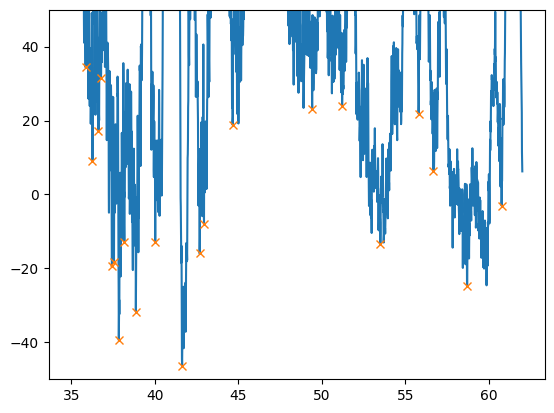

In [192]:
plt.plot(x,y-cheb(x))
plt.ylim(-50,50)
peaks2_cheb, properties2=signal.find_peaks(np.negative(y-cheb(x)),prominence=40,distance=10)
y_neg_peaks_cheb=y[peaks2_cheb]-cheb(x[peaks2_cheb])
plt.plot(x[peaks2_cheb],y[peaks2_cheb]-cheb(x[peaks2_cheb]),'x')
# y[peaks[y[peaks2]>0]]

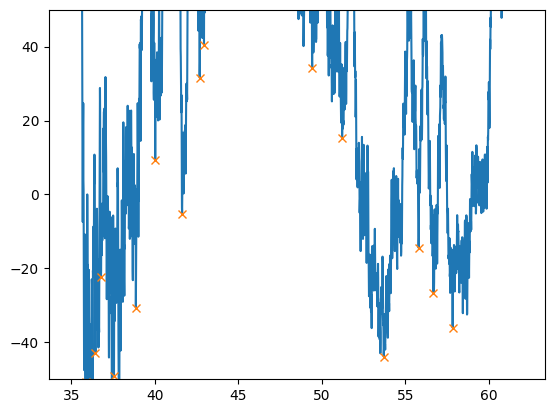

In [193]:
quad_vals=quadr_bkg(x,params[0][0],params[0][1],params[0][2],params[0][3],params[0][4])
plt.plot(x,y-quad_vals)
plt.ylim(-50,50)

peaks2_quad, properties2=signal.find_peaks(np.negative(y-quad_vals),prominence=40,distance=10)
y_neg_peaks_quad=y[peaks2_quad]-quad_vals[peaks2_quad]
plt.plot(x[peaks2_quad],y[peaks2_quad]-quad_vals[peaks2_quad],'x')
# y[peaks[y[peaks2]>0]]


(0.0, 2000.0)

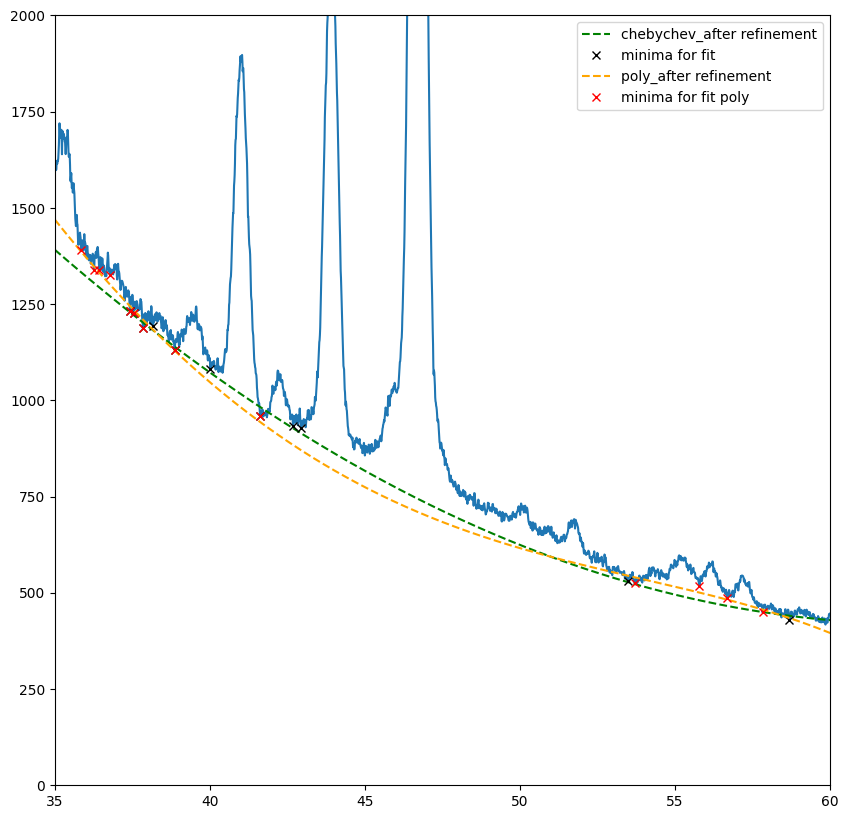

In [196]:
fig,ax=plt.subplots(figsize=(10,10))
# plt.plot(prof[:,0],prof[:,1])
plt.plot(x,y)
# x=np.arange(35,135,1)
#plt.plot(crds[:,0],quadr_bkg(crds[:,0],cheb[0],cheb[1],cheb[2],cheb[3],cheb[4]))
# plt.plot(x,quadr_bkg(x,params[0][0],params[0][1],params[0][2],params[0][3],params[0][4]),label='polynomial deg4')#,params[0][5]))
# plt.plot(x,cheb(x),color='green',label='chebychev')
cheb2=np.polynomial.Chebyshev.fit(x[peaks2_cheb[y_neg_peaks_cheb<0]],y[peaks2_cheb[y_neg_peaks_cheb<0]],2)
plt.plot(x,cheb2(x),'--',color='green',label='chebychev_after refinement')
plt.plot(x[peaks2_cheb[y_neg_peaks_cheb<0]],y[peaks2_cheb[y_neg_peaks_cheb<0]],'x',color='black',label='minima for fit')


params2=optimize.curve_fit(quadr_bkg,x[peaks2_quad[y_neg_peaks_quad<0]],y[peaks2_quad[y_neg_peaks_quad<0]])
plt.plot(x,quadr_bkg(x,params2[0][0],params2[0][1],params2[0][2],params2[0][3],params2[0][4]),'--',color='orange',label='poly_after refinement')
plt.plot(x[peaks2_quad[y_neg_peaks_quad<0]],y[peaks2_quad[y_neg_peaks_quad<0]],'x',color='red',label='minima for fit poly')
plt.legend()
#plt.plot(prof[:,0],np.polynomial.chebyshev.chebval(prof[:,0],cheb))
plt.xlim(35,60)
plt.ylim(0,2000)

(33.65, 63.35)

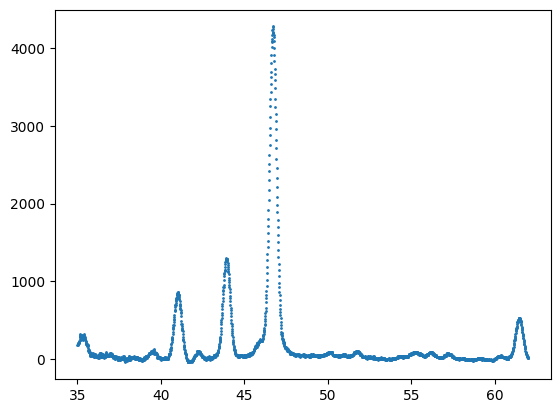

In [229]:
plt.scatter(x,y-cheb(x),s=1)
plt.xlim()

In [205]:
np.savetxt('background.txt',[x,cheb2(x)])

In [230]:
data['back_cor']=y-cheb(x)

In [231]:
data

,2theta,intensity,back_cor
0,35.00,1594.567,178.972318
1,35.01,1604.538,189.646900
2,35.02,1618.749,204.561230
3,35.03,1610.409,196.924309
4,35.04,1597.848,185.066138
...,...,...,...
2696,61.96,458.170,27.319409
2697,61.97,452.987,22.163098
2698,61.98,442.260,11.462537
2699,61.99,439.624,8.852725


In [227]:
data.to_csv('vals.txt',columns=['2theta','back_cor'],index=False,sep=' ')

In [ ]:
xy.save

In [212]:

np.savetxt('intensities.xy',(x,y-cheb2(x)),delimiter=' ',newline='\n')

In [181]:
cheb2=np.polynomial.Chebyshev.fit(x[peaks2[y_neg_peaks<0]],y[peaks2[y_neg_peaks<0]],2)
params=optimize.curve_fit(quadr_bkg,x[peaks2],y[peaks2])

In [168]:
y[peaks2[y_neg_peaks<0]]

array([1232.613, 1225.91 , 1186.446, 1192.298, 1130.96 , 1081.03 ,
        957.873,  933.224,  927.919,  529.983,  428.178,  432.854])

In [151]:

peaks2

array([  23,   35,   85,  126,  162,  177,  243,  255,  284,  317,  386,
        502,  663,  768,  794,  965, 1442, 1621, 1850, 2079, 2168, 2369,
       2576], dtype=int64)

In [87]:
peaks>50

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [6]:
if xy.stem[-1]=='4':
    data=data[data['2theta']>99]

50_45_3mm_dic
50_45_4mm_dic
50_45_5mm_dic
50_45_head_dic
C02_ascast


C:\Users\berners\AppData\Local\Temp\ipykernel_15752\2273843322.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgb = mpl.cm.get_cmap('viridis',6)#[np.newaxis, :, :3]


<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)>

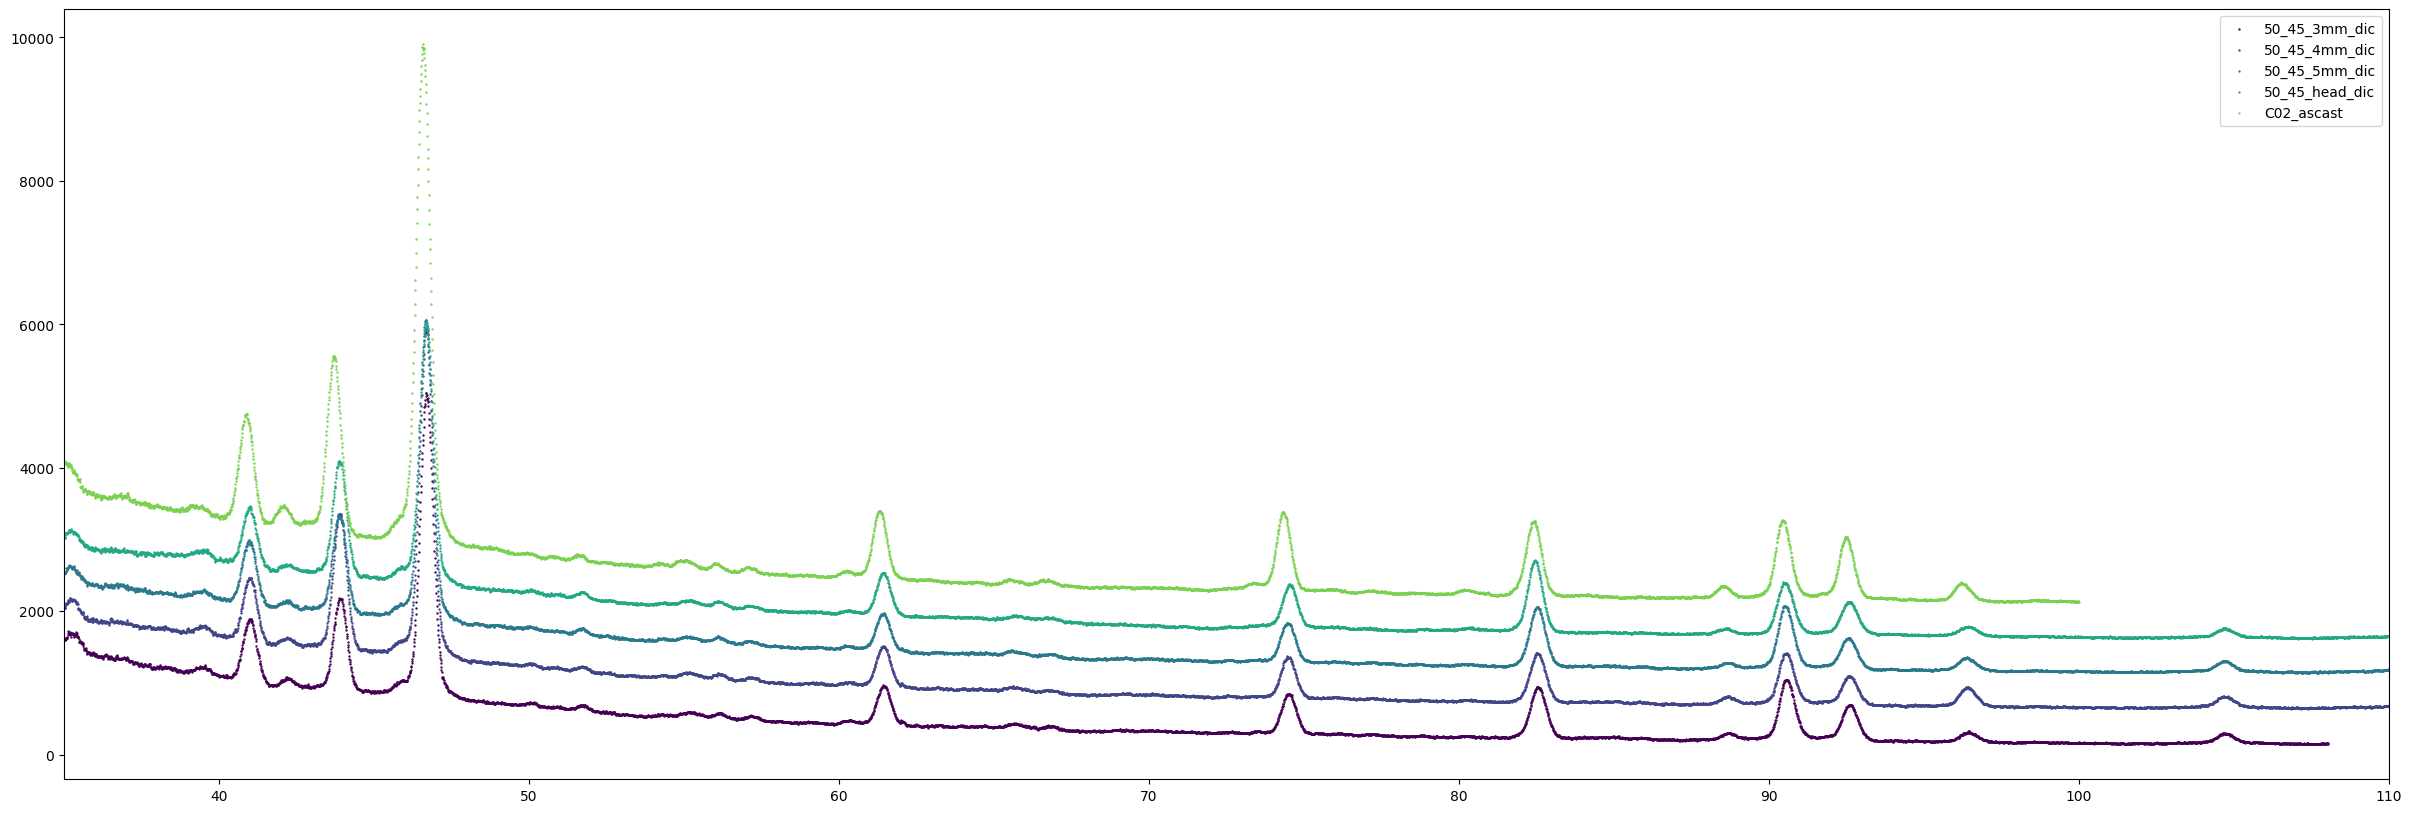

In [16]:
fig,ax=plt.subplots(figsize=(30,10))
import seaborn as sns
# color=['gray','red','blue']
rgb = mpl.cm.get_cmap('viridis',6)#[np.newaxis, :, :3]
rgb=rgb(np.linspace(0,0.7,5))
# rgb[4]=1
# rgb.append('black')
# colors=mp
i=0
for key in df['fname'].unique():
    print(key)
    data=df[df['fname']==key]
    ax.scatter(data['2theta'],data['intensity']+i*500,s=0.5,color=rgb[i],label=key)
    i=i+1
ax.legend()
ax.set_xlim(35,110)
plt.subplots